In [ ]:
# Импорт Pandas для работы с DataFrame
import pandas as pd

In [ ]:
# Чтение CSV-файла в DataFrame
df = pd.read_csv("credit_scoring.csv")

# Вывод первых 5 строк для проверки
print(df.head())

   client_id          DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0          0     0.496289  49.1        13                   0            0.0   
1          1     0.433567  48.0         9                   2            2.0   
2          2  2206.731199  55.5        21                   1            NaN   
3          3   886.132793  55.3         3                   0            0.0   
4          4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0          NaN   
3                      0                      0          NaN   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  
0              0.387028             0  
1              0.234679             0  
2             

In [ ]:
# Вывод количества пропусков по всем столбцам
print("Пропущенные значения по всем столбцам:")
print(df.isnull().sum())

Пропущенные значения по всем столбцам:
client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1916
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14847
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64
Пропущенные значения по всем столбцам:
client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1916
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14847
BalanceToCreditLimit         0
Delinquent90                 0
dtype: int64


In [ ]:
# Найти полностью одинаковые строки
print("Полные дубликаты строк:", df.duplicated().any())

Полные дубликаты строк: False
Полные дубликаты строк: False


In [ ]:
# удаление ненужного столбца
df = df.drop(columns=['client_id'])

# Проверим результат
print(df.head())

           DIR   Age  NumLoans  NumRealEstateLoans  NumDependents  \
0     0.496289  49.1        13                   0            0.0   
1     0.433567  48.0         9                   2            2.0   
2  2206.731199  55.5        21                   1            NaN   
3   886.132793  55.3         3                   0            0.0   
4     0.000000  52.3         1                   0            0.0   

   Num30-59Delinquencies  Num60-89Delinquencies       Income  \
0                      2                      0  5298.360639   
1                      1                      0  6008.056256   
2                      1                      0          NaN   
3                      0                      0          NaN   
4                      0                      0  2504.613105   

   BalanceToCreditLimit  Delinquent90  
0              0.387028             0  
1              0.234679             0  
2              0.348227             0  
3              0.971930             0  


In [ ]:
# заполнить 0 (предположение, что нет иждивенцев)
df['NumDependents'] = df['NumDependents'].fillna(0)

# заполнить медианой (устойчивость к выбросам)
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)


# Вывод количества пропусков по всем столбцам
print("Пропущенные значения по всем столбцам:")
print(df.isnull().sum())

Пропущенные значения по всем столбцам:
DIR                      0
Age                      0
NumLoans                 0
NumRealEstateLoans       0
NumDependents            0
Num30-59Delinquencies    0
Num60-89Delinquencies    0
Income                   0
BalanceToCreditLimit     0
Delinquent90             0
dtype: int64
Пропущенные значения по всем столбцам:
DIR                      0
Age                      0
NumLoans                 0
NumRealEstateLoans       0
NumDependents            0
Num30-59Delinquencies    0
Num60-89Delinquencies    0
Income                   0
BalanceToCreditLimit     0
Delinquent90             0
dtype: int64


In [ ]:
X = df.drop(columns=['Delinquent90']) # Все признаки, кроме ID и таргета
y = df['Delinquent90'] # Целевая переменная

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y # stratify=y важно для балансировки классов в таргете
)

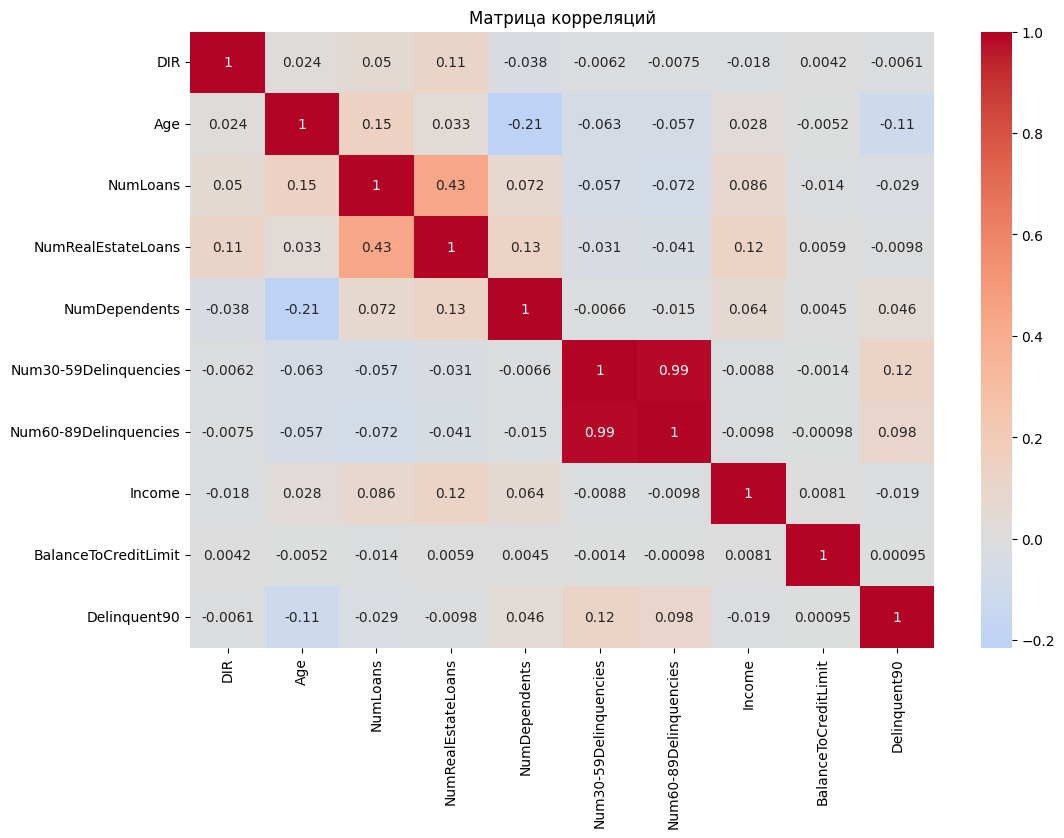

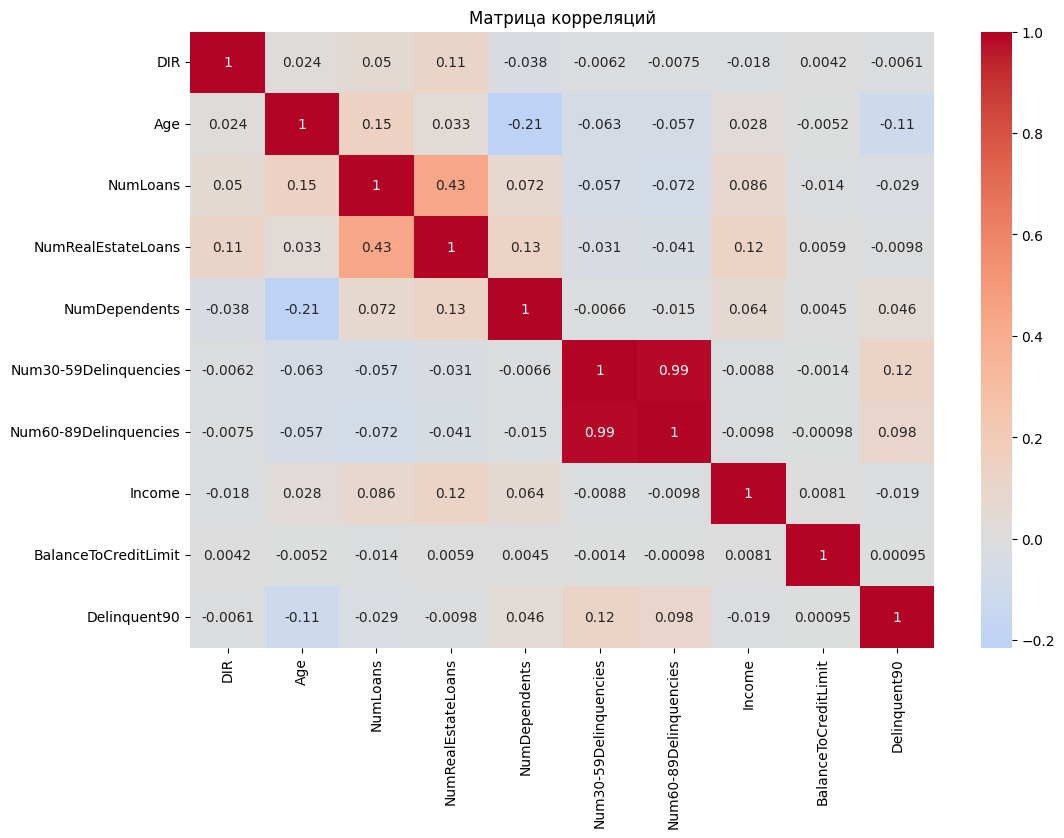

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Создаем модель
dt = DecisionTreeClassifier(
    max_depth=3,          # Ограничьте глубину для читаемой визуализации!
    random_state=42,
    criterion='gini'      # или 'entropy'
)

# Обучаем на обучающих данных
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred = dt.predict(X_test)          # предсказанные классы (0 или 1)
y_pred_proba = dt.predict_proba(X_test)  # вероятности для каждого класса

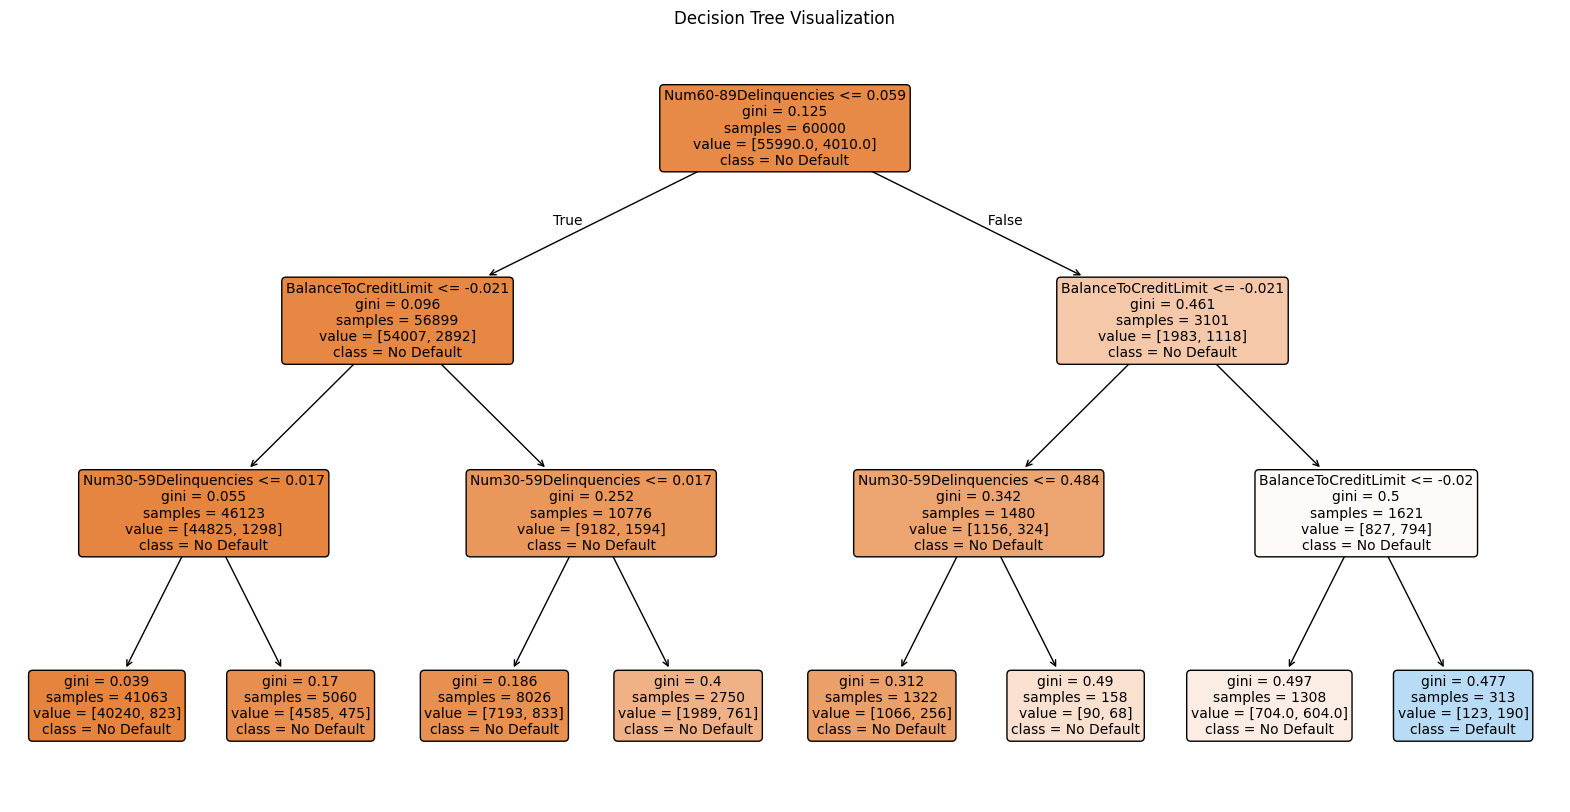

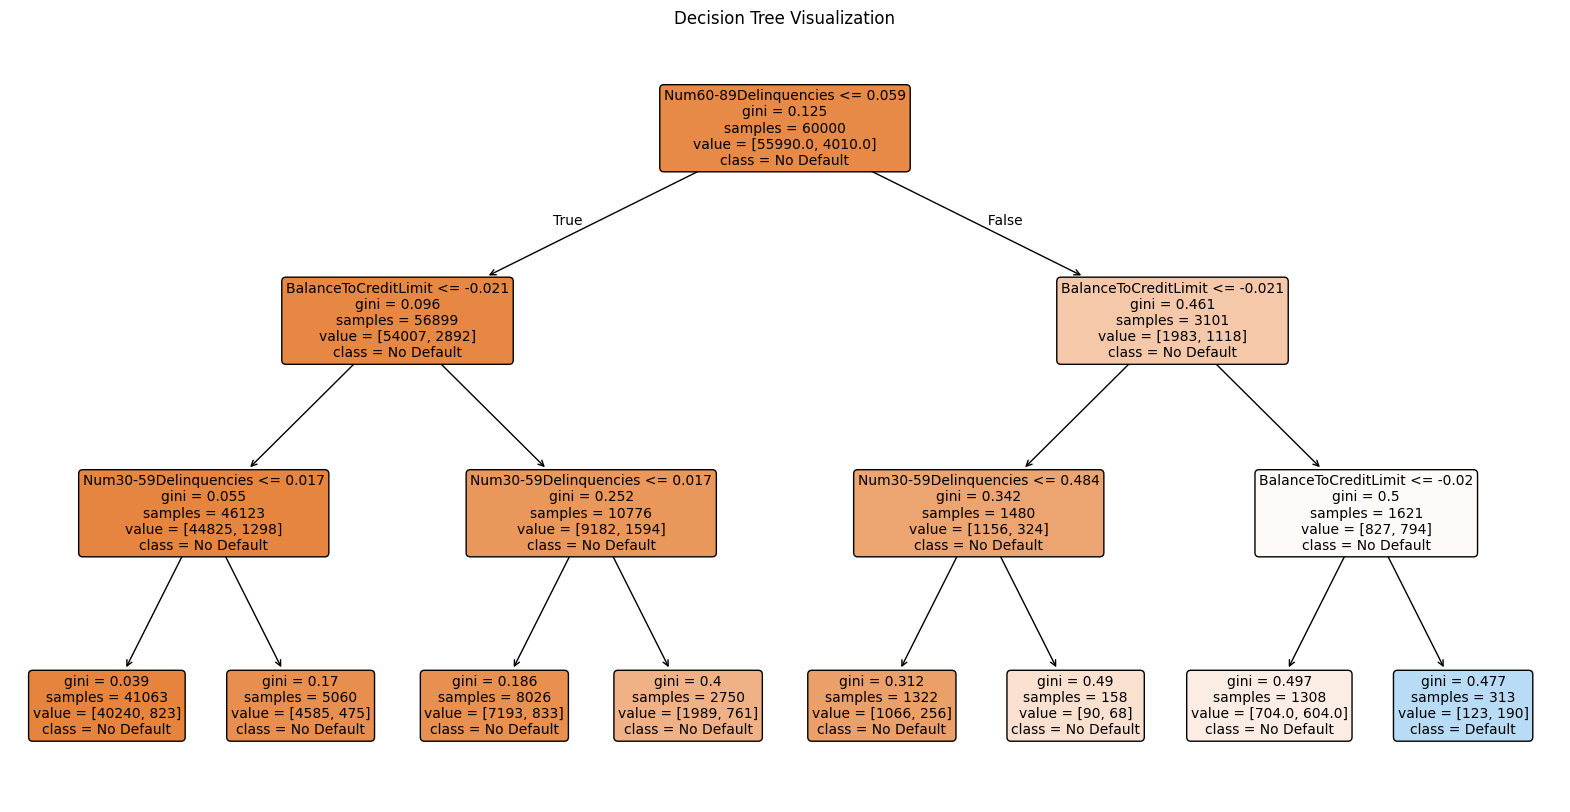

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=df.columns,  # Имена признаков
    class_names=['No Default', 'Default'],  # Имена классов (0 и 1)
    filled=True,        # Цвета узлов по классу
    rounded=True,       # Скруглённые узлы
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

Accuracy: 0.9341
Precision: 0.5882
Recall: 0.0499
F1-Score: 0.0919
ROC-AUC: 0.7918

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13997
           1       0.59      0.05      0.09      1003

    accuracy                           0.93     15000
   macro avg       0.76      0.52      0.53     15000
weighted avg       0.91      0.93      0.91     15000



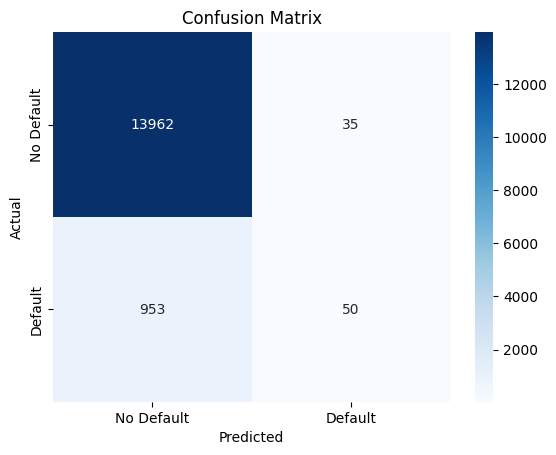

Accuracy: 0.9341
Precision: 0.5882
Recall: 0.0499
F1-Score: 0.0919
ROC-AUC: 0.7918

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13997
           1       0.59      0.05      0.09      1003

    accuracy                           0.93     15000
   macro avg       0.76      0.52      0.53     15000
weighted avg       0.91      0.93      0.91     15000



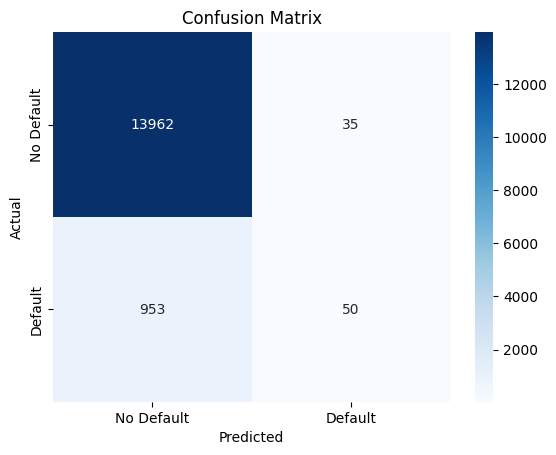

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Метрики
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba[:, 1])  # для вероятностей класса 1

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {auc:.4f}")

# Подробный отчёт
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

print(f"{'Depth':<5} {'Train Acc':<10} {'Test Acc':<10} {'Train F1':<10} {'Test F1':<10} {'Test AUC':<10}")
print("-" * 60)

best_f1 = 0
best_depth = 1

for depth in range(1, 12):  # от 1 до 11
    # Обучаем дерево
    dt = DecisionTreeClassifier(
        max_depth=depth,
        random_state=42,
        class_weight='balanced'  # важно для несбалансированных данных
    )
    dt.fit(X_train, y_train)

    # Предсказания
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    y_test_proba = dt.predict_proba(X_test)[:, 1]

    # Метрики
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)

    # Вывод строки
    print(f"{depth:<5} {train_acc:<10.4f} {test_acc:<10.4f} {train_f1:<10.4f} {test_f1:<10.4f} {test_auc:<10.4f}")

    # Отслеживаем лучшую глубину по F1 на тесте
    if test_f1 > best_f1:
        best_f1 = test_f1
        best_depth = depth

print("-" * 60)
print(f"Оптимальная глубина по F1-score: {best_depth} (F1 = {best_f1:.4f})")

Depth Train Acc  Test Acc   Train F1   Test F1    Test AUC  
------------------------------------------------------------
1     0.7087     0.7029     0.2557     0.2508     0.7219    
2     0.6520     0.6466     0.2455     0.2409     0.7812    
3     0.6453     0.6413     0.2455     0.2412     0.8011    
4     0.7884     0.7880     0.3143     0.3087     0.8125    
5     0.7586     0.7536     0.3023     0.2879     0.8181    
6     0.7770     0.7721     0.3154     0.2984     0.8163    
7     0.7911     0.7854     0.3287     0.3028     0.8166    
8     0.7876     0.7781     0.3335     0.2970     0.8092    
9     0.7948     0.7774     0.3461     0.2948     0.7995    
10    0.7930     0.7731     0.3529     0.2894     0.7736    
11    0.8099     0.7829     0.3766     0.2903     0.7542    
------------------------------------------------------------
Оптимальная глубина по F1-score: 4 (F1 = 0.3087)
Depth Train Acc  Test Acc   Train F1   Test F1    Test AUC  
------------------------------------

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Определяем сетку параметров
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}

# Создаём модель
dt = DecisionTreeClassifier(random_state=42)

# Поиск лучших параметров
grid_search = GridSearchCV(
    dt,
    param_grid,
    cv=5,                     # кросс-валидация
    scoring='f1',             # или 'recall', 'roc_auc', 'average_precision'
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1 (CV):", grid_search.best_score_)

Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10}
Лучший F1 (CV): 0.3143727138651419
Лучшие параметры: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 10}
Лучший F1 (CV): 0.3143727138651419


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier


# Базовая модель — дерево решений
base_estimator = DecisionTreeClassifier(random_state=42)

# Ансамбль — бэггинг
bagging = BaggingClassifier(estimator=base_estimator, random_state=42)

# Правильная сетка параметров для DecisionTreeClassifier
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.7, 1.0],
    'estimator__max_depth': [3, 5, 7, None],           # глубина дерева
    'estimator__min_samples_split': [2, 5, 10],        # мин. объектов для разделения
    'estimator__criterion': ['gini', 'entropy'],       # критерий качества
    'estimator__min_samples_leaf': [1, 2, 4]           # мин. объектов в листе
}

# Поиск по сетке
grid_search = GridSearchCV(
    bagging,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

print("Начинаем подбор гиперпараметров...")
grid_search.fit(X_train, y_train)

# Вывод результатов
print("\nЛучшие параметры:")
print(grid_search.best_params_)
print(f"Лучший ROC-AUC на CV: {grid_search.best_score_:.4f}")

# Оценка на тесте
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Тестовый ROC-AUC: {test_roc_auc:.4f}")

Начинаем подбор гиперпараметров...
Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
